In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA
import copy

sigma = 3
n = 101
n_comp = 21


##### generate gaussian process #####

                
def window(x,r = 40,c = 50):
    for i in range(n):
        for j in range(n):
            r2 = (i-c)**2+(j-c)**2
            if r2 <= 40*40:
                x[i,j] = x[i,j]*np.sqrt(1 - r2/1600)
            else:
                x[i,j] = 0
    return copy.deepcopy(x)


grid_y1, grid_x1 = np.meshgrid(range(101), range(101))

grid_y1 -= 50
grid_y1 = grid_y1*0.2
grid_x1 -= 50
grid_x1 = grid_x1*0.2


xs = []
for i in range(40000):
    np.random.seed()
    x = np.random.normal(0,sigma,size = (n,n))
    x = window(x)
    x = filters.gaussian_filter(x,sigma = 3)
    xs.append(x.reshape(n*n))



In [11]:
##### Apply PCA to realizations of GP #####

pca = PCA(n_components=n_comp)
pca.fit(xs)

ratio = pca.explained_variance_ratio_
comp = pca.components_

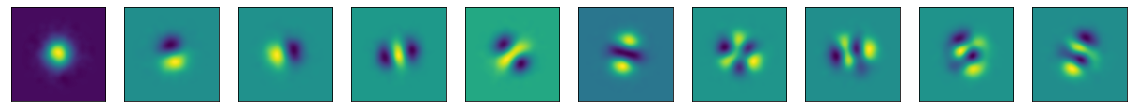

In [12]:
##### Eigenmodes #####

plt.figure(figsize=(20,20))
modes = comp.reshape(n_comp,101,101)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(modes[i])
#plt.show()
#np.save('./results/fine_pca_comp.npy', modes)

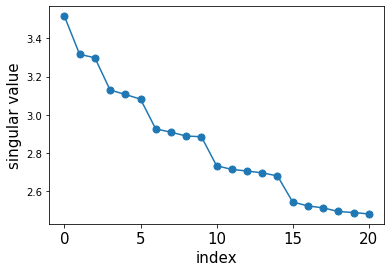

In [13]:
##### Eigenvalues #####

x = pca.singular_values_
plt.plot(np.arange(21), x/100, markersize=7, marker="o")
plt.xticks([0,5,10,15,20],fontsize=15)
#plt.yticks([1.0,1.2,1.4,1.6,1.8],fontsize=15)
plt.xlabel("index", fontsize=15)
#plt.ylabel("singular value", fontsize=15)
#np.save('./results/fine_pca_sv.npy', x)

In [90]:
# corase grid
xs = np.array(xs)
coarse_xs = xs.reshape(-1,101,101)[:,::10,::10].reshape(40000,121)[:1000]

In [85]:
pca2 = PCA(n_components=n_comp)
pca2.fit(coarse_xs)

sv = pca2.singular_values_
comp = pca2.components_

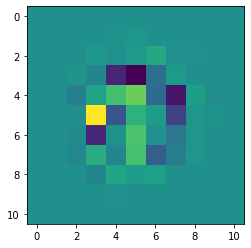

In [86]:
plt.imshow(comp[9].reshape(11,11))

In [87]:
from scipy.interpolate import interp2d

interp_comp = []
for i in range(10):
    x = np.arange(0,101,10)
    y = np.arange(0,101,10)
    z = comp[i].reshape(11,11)
    f = interp2d(x,y,z)
    x1 = np.arange(0,101)
    y1 = np.arange(0,101)
    z1 = f(x1,y1)
    interp_comp.append(z1)

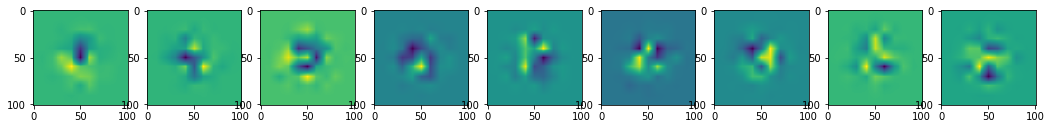

In [88]:
plt.figure(figsize=(20,20))
for i in range(i):
    plt.subplot(1,10,i+1)
    plt.imshow(interp_comp[i])

In [101]:
np.save('./results/coarse_pca_comp.npy', interp_comp)
np.save('./results/coarse_pca_sv.npy', sv)